In [137]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [138]:
with rasterio.open("2025/MOD_NDVI_M_2025-01-01_rgb_720x360.FLOAT.tiff") as src:
    ndvi_2025 = src.read(1)
with rasterio.open("2005/MOD_NDVI_M_2005-12-01_rgb_720x360.FLOAT.tiff") as src:
    ndvi_2005 = src.read(1)


In [139]:
ndvi_2025 = ndvi_2025.astype(float)
ndvi_2005 = ndvi_2005.astype(float)


In [140]:
print(np.isnan(ndvi_2025).sum())
print(np.isnan(ndvi_2005).sum())

0
0


In [141]:
ndvi_diff = ndvi_2025 - ndvi_2005
ndvi_diff

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(360, 720))

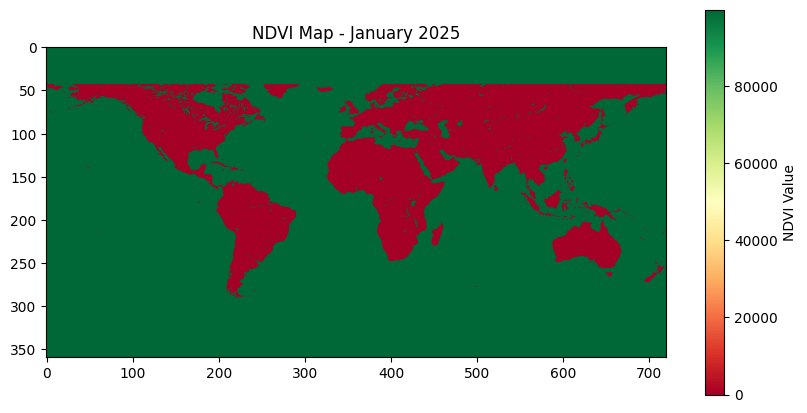

In [142]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2025, cmap='RdYlGn')
plt.title("NDVI Map - January 2025")
plt.colorbar(label="NDVI Value")
plt.show()


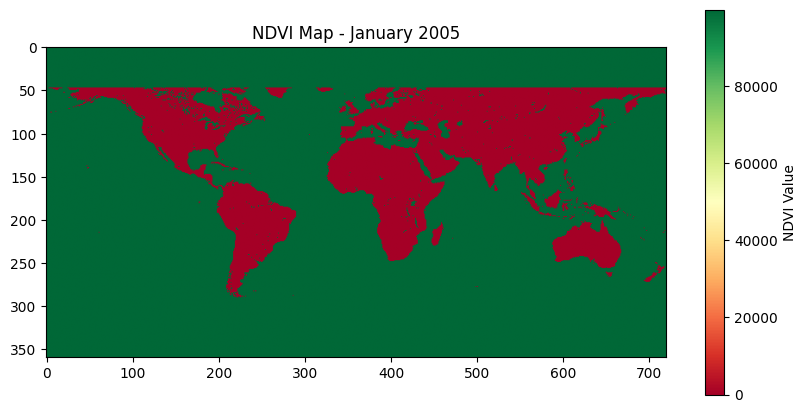

In [143]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2005, cmap='RdYlGn')
plt.title("NDVI Map - January 2005")
plt.colorbar(label="NDVI Value")
plt.show()


Scale seems to be off

In [144]:
print("Min:", np.nanmin(ndvi_2005))
print("Max:", np.nanmax(ndvi_2005))
print("Min:", np.nanmin(ndvi_2025))
print("Max:", np.nanmax(ndvi_2025))


Min: -0.10000000149011612
Max: 99999.0
Min: -0.10000000149011612
Max: 99999.0


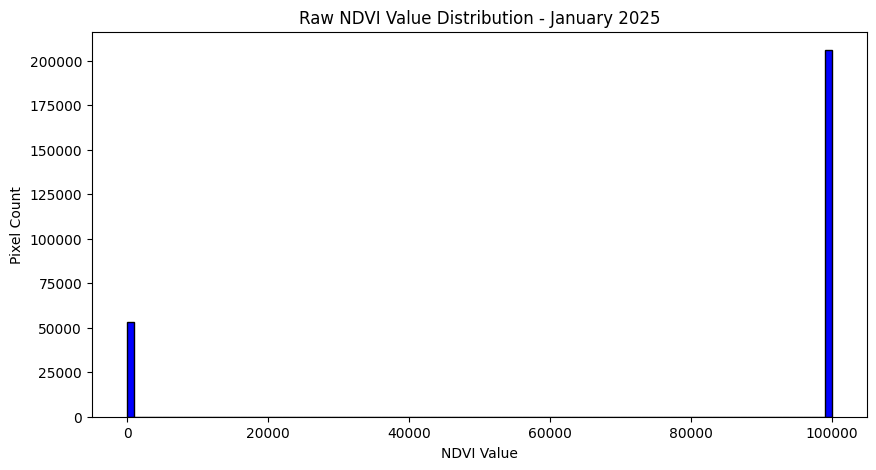

In [145]:
ndvi_flat_2025 = ndvi_2025.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2025, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

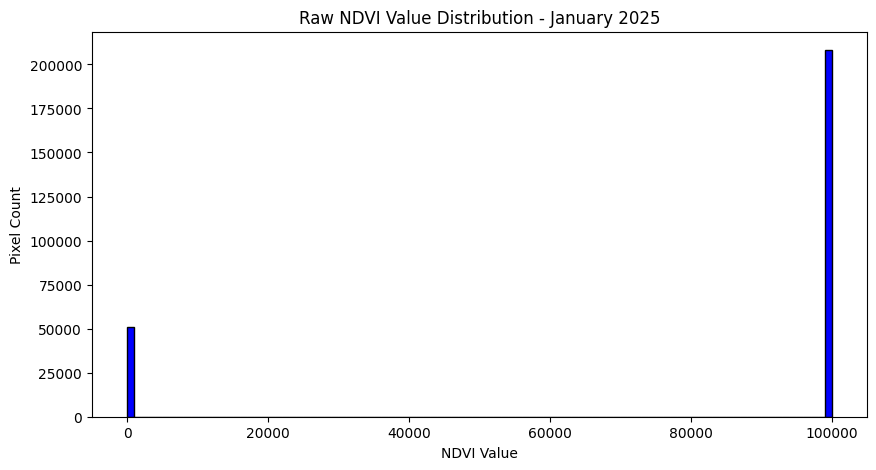

In [146]:
ndvi_flat_2005 = ndvi_2005.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2005, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

Distribution doesn't make sense, high max value is likely placeholders. Changing them to 1

In [147]:
ndvi_2025 = np.where(ndvi_2025 == 99999, np.nan, ndvi_2025)
ndvi_2005 = np.where(ndvi_2005 == 99999, np.nan, ndvi_2005)

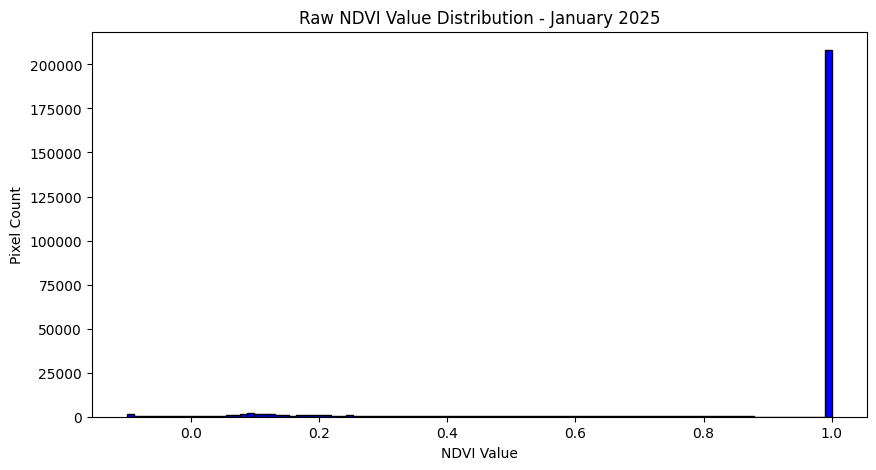

In [148]:
ndvi_flat_2005 = ndvi_2005_visual.flatten()

plt.figure(figsize=(10,5))
plt.hist(ndvi_flat_2005, bins=100, color='blue', edgecolor='black')
plt.title("Raw NDVI Value Distribution - January 2025")
plt.xlabel("NDVI Value")
plt.ylabel("Pixel Count")
plt.show()

Distribution now makes a lot more sense

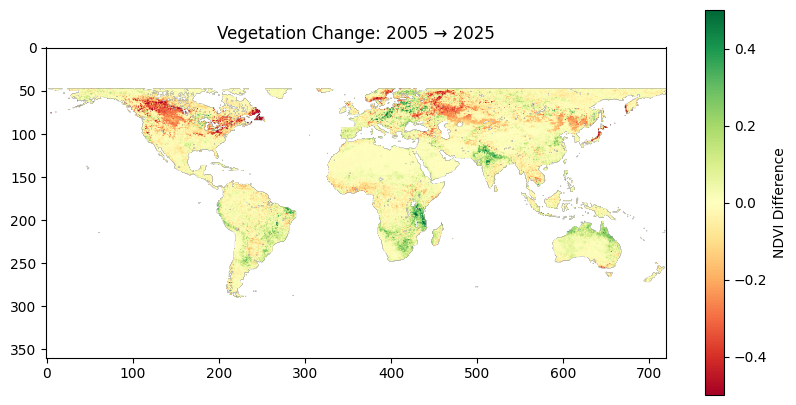

In [154]:
ndvi_diff = ndvi_2025 - ndvi_2005

plt.figure(figsize=(10, 5))
plt.imshow(ndvi_diff, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
plt.title("Vegetation Change: 2005 → 2025")
plt.colorbar(label="NDVI Difference")
plt.show()


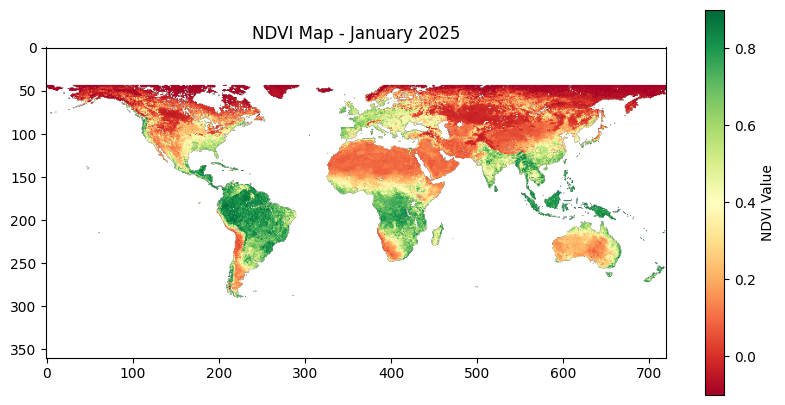

In [150]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2025, cmap='RdYlGn')
plt.title("NDVI Map - January 2025")
plt.colorbar(label="NDVI Value")
plt.show()


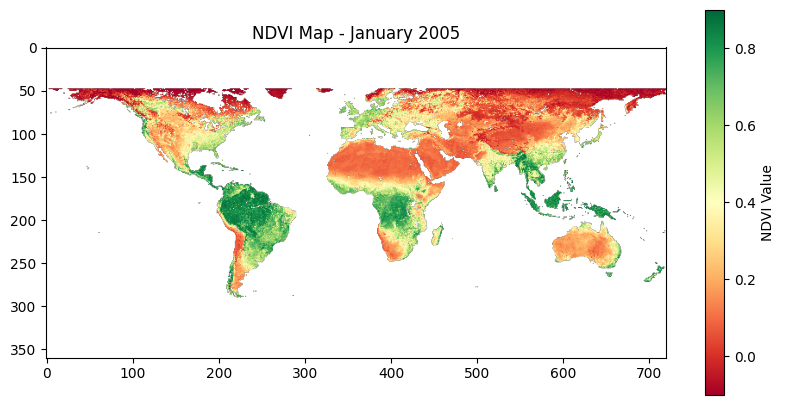

In [152]:
plt.figure(figsize=(10, 5))
plt.imshow(ndvi_2005, cmap='RdYlGn')
plt.title("NDVI Map - January 2005")
plt.colorbar(label="NDVI Value")
plt.show()